In [41]:
import pandas as pd
data = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")
display(data)

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/8/requestedDeparture,userInputs/8/userID,userInputs/9/WhPerMile,userInputs/9/kWhRequested,userInputs/9/milesRequested,userInputs/9/minutesAvailable,userInputs/9/modifiedAt,userInputs/9/paymentRequired,userInputs/9/requestedDeparture,userInputs/9/userID
0,5dd1f434f9af8b2dec17805f,39,"Fri, 01 Nov 2019 14:11:14 GMT","Fri, 01 Nov 2019 15:27:06 GMT","Fri, 01 Nov 2019 15:27:01 GMT",4.279,2_39_89_25_2019-11-01 14:11:13.813067,2,CA-315,2-39-89-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5dd1f434f9af8b2dec178060,39,"Fri, 01 Nov 2019 14:43:05 GMT","Fri, 01 Nov 2019 23:36:35 GMT","Fri, 01 Nov 2019 18:24:36 GMT",11.769,2_39_90_26_2019-11-01 14:43:04.819121,2,CA-316,2-39-90-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5dd1f434f9af8b2dec178061,39,"Fri, 01 Nov 2019 14:52:02 GMT","Fri, 01 Nov 2019 20:54:46 GMT","Fri, 01 Nov 2019 19:52:10 GMT",0.889,2_39_139_28_2019-11-01 14:52:02.094336,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5dd1f434f9af8b2dec178062,39,"Fri, 01 Nov 2019 15:24:52 GMT","Fri, 01 Nov 2019 19:19:15 GMT","Fri, 01 Nov 2019 19:19:10 GMT",13.430,2_39_78_366_2019-11-01 15:24:51.692724,2,CA-323,2-39-78-366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5dd1f434f9af8b2dec178063,39,"Fri, 01 Nov 2019 15:59:05 GMT","Fri, 01 Nov 2019 23:07:37 GMT","Fri, 01 Nov 2019 19:39:17 GMT",12.001,2_39_79_383_2019-11-01 15:59:04.798455,2,CA-492,2-39-79-383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,5edae38af9af8b516897ae3c,39,"Wed, 20 May 2020 19:08:53 GMT","Thu, 21 May 2020 04:12:54 GMT",NaN,6.254,2_39_131_30_2020-05-20 19:08:37.787386,2,CA-305,2-39-131-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3505,5ee2cc8df9af8b67c338cd47,39,"Tue, 26 May 2020 20:06:06 GMT","Tue, 26 May 2020 22:37:10 GMT","Tue, 26 May 2020 22:38:08 GMT",0.820,2_39_139_28_2020-05-26 20:06:06.399729,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,5ee2cc8df9af8b67c338cd48,39,"Tue, 26 May 2020 22:37:30 GMT","Tue, 26 May 2020 22:47:29 GMT","Tue, 26 May 2020 22:47:20 GMT",0.544,2_39_139_28_2020-05-26 22:37:29.854698,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,5ee41e0af9af8b69c1dccda5,39,"Wed, 27 May 2020 16:22:32 GMT","Wed, 27 May 2020 19:13:38 GMT","Wed, 27 May 2020 19:13:33 GMT",19.086,2_39_139_28_2020-05-27 16:22:31.700830,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import pytz

# Load your CSV (if not already done)
df = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")

# Parse the datetime columns and set UTC as timezone
df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')



In [39]:
import numpy as np
from datetime import datetime, timedelta

# Convert connection and disconnection times to datetime
df['connectionTime'] = pd.to_datetime(df['connectionTime'], errors='coerce', utc=True)
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], errors='coerce', utc=True)

# Drop rows with missing timestamps or kWhDelivered
df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered'])

# Create a vector for total minutes in a day
minutes_in_day = 24 * 60
energy_per_minute = np.zeros(minutes_in_day)
count_per_minute = np.zeros(minutes_in_day)

# Process each session
for _, row in df.iterrows():
    start = row['connectionTime']
    end = row['disconnectTime']
    energy = row['kWhDelivered']
    
    if end <= start:
        continue  # skip invalid sessions

    # Spread energy evenly over session duration
    duration_minutes = int((end - start).total_seconds() / 60)
    if duration_minutes == 0:
        continue

    energy_per_session_minute = energy / duration_minutes

    for i in range(duration_minutes):
        minute_time = start + timedelta(minutes=i)
        minute_of_day = minute_time.hour * 60 + minute_time.minute
        energy_per_minute[minute_of_day] += energy_per_session_minute
        count_per_minute[minute_of_day] += 1

# Calculate average power draw in kW
average_power_kw = energy_per_minute  # Already in kWh per minute

average_power_kw[:10]  # Preview the first 10 minutes of the day


array([45.14475118, 45.06618053, 45.01860899, 44.86947504, 44.85982783,
       44.77350451, 44.6273005 , 44.36034132, 44.34770844, 44.03188819])

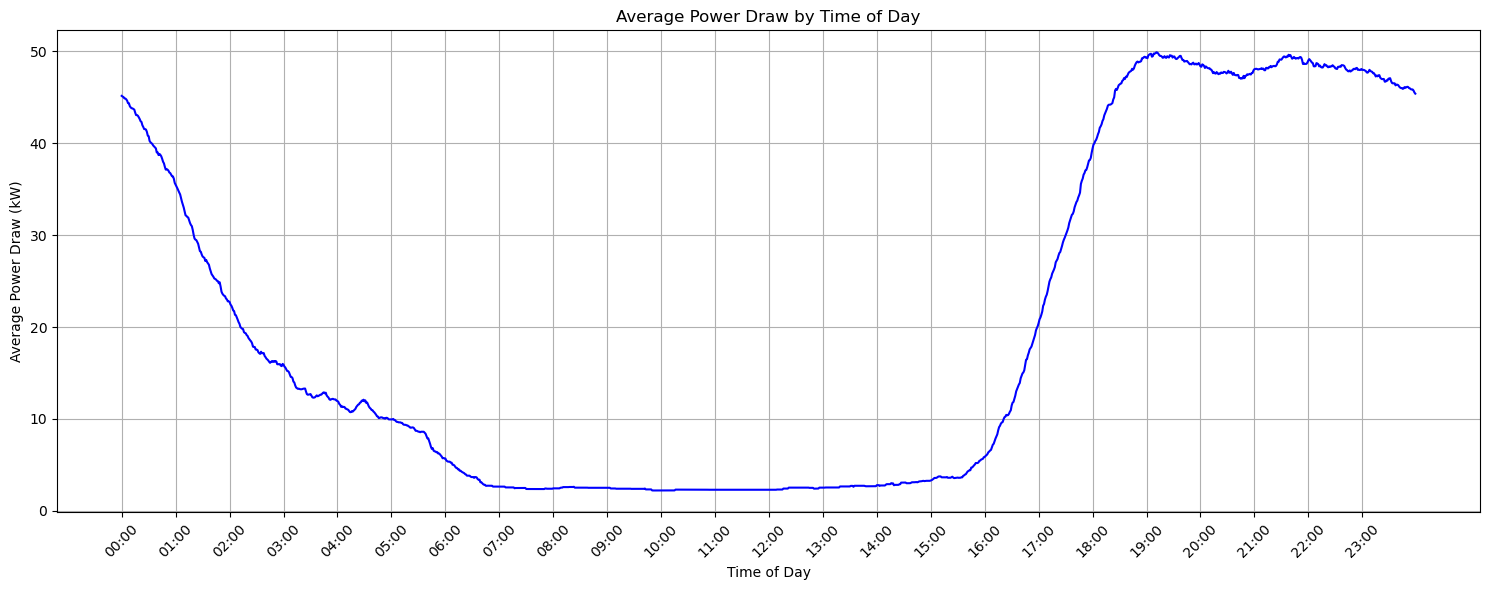

In [40]:
import matplotlib.pyplot as plt

# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot
plt.figure(figsize=(15, 6))
plt.plot(average_power_kw, color='blue', linewidth=1.5)
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
import pytz

# Load your dataset
file_path = "Data/acndata_sessions 2019_11 till 2020_5 caltech.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)


In [35]:
# Define time zones
gmt_tz = pytz.timezone("GMT")  # UTC/GMT
pacific_tz = pytz.timezone("America/Los_Angeles")  # PST/PDT

# Convert relevant datetime columns
time_columns = ["connectionTime", "disconnectTime", "doneChargingTime"]  # Adjust based on your dataset

for col in time_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")  # Convert to datetime
    df[col] = df[col].dt.tz_localize(gmt_tz, ambiguous="NaT", nonexistent="NaT")  # Assign GMT
    df[col] = df[col].dt.tz_convert(pacific_tz)  # Convert to PST/PDT



In [36]:
display(df)

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/8/requestedDeparture,userInputs/8/userID,userInputs/9/WhPerMile,userInputs/9/kWhRequested,userInputs/9/milesRequested,userInputs/9/minutesAvailable,userInputs/9/modifiedAt,userInputs/9/paymentRequired,userInputs/9/requestedDeparture,userInputs/9/userID
0,5dd1f434f9af8b2dec17805f,39,2019-11-01 07:11:14-07:00,2019-11-01 08:27:06-07:00,2019-11-01 08:27:01-07:00,4.279,2_39_89_25_2019-11-01 14:11:13.813067,2,CA-315,2-39-89-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5dd1f434f9af8b2dec178060,39,2019-11-01 07:43:05-07:00,2019-11-01 16:36:35-07:00,2019-11-01 11:24:36-07:00,11.769,2_39_90_26_2019-11-01 14:43:04.819121,2,CA-316,2-39-90-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5dd1f434f9af8b2dec178061,39,2019-11-01 07:52:02-07:00,2019-11-01 13:54:46-07:00,2019-11-01 12:52:10-07:00,0.889,2_39_139_28_2019-11-01 14:52:02.094336,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5dd1f434f9af8b2dec178062,39,2019-11-01 08:24:52-07:00,2019-11-01 12:19:15-07:00,2019-11-01 12:19:10-07:00,13.430,2_39_78_366_2019-11-01 15:24:51.692724,2,CA-323,2-39-78-366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5dd1f434f9af8b2dec178063,39,2019-11-01 08:59:05-07:00,2019-11-01 16:07:37-07:00,2019-11-01 12:39:17-07:00,12.001,2_39_79_383_2019-11-01 15:59:04.798455,2,CA-492,2-39-79-383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,5edae38af9af8b516897ae3c,39,2020-05-20 12:08:53-07:00,2020-05-20 21:12:54-07:00,NaT,6.254,2_39_131_30_2020-05-20 19:08:37.787386,2,CA-305,2-39-131-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3505,5ee2cc8df9af8b67c338cd47,39,2020-05-26 13:06:06-07:00,2020-05-26 15:37:10-07:00,2020-05-26 15:38:08-07:00,0.820,2_39_139_28_2020-05-26 20:06:06.399729,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,5ee2cc8df9af8b67c338cd48,39,2020-05-26 15:37:30-07:00,2020-05-26 15:47:29-07:00,2020-05-26 15:47:20-07:00,0.544,2_39_139_28_2020-05-26 22:37:29.854698,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,5ee41e0af9af8b69c1dccda5,39,2020-05-27 09:22:32-07:00,2020-05-27 12:13:38-07:00,2020-05-27 12:13:33-07:00,19.086,2_39_139_28_2020-05-27 16:22:31.700830,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Save the updated dataset with CET timestamps
updated_file_path = "updated_charging_sessions_CET.csv"
df.to_csv(updated_file_path, index=False)

print(f"Updated file saved as: {updated_file_path}")

Updated file saved as: updated_charging_sessions_CET.csv


In [43]:
import pandas as pd
import pytz
from datetime import timedelta
import numpy as np

# Load the dataset
df = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")

# Define the correct timezone
pacific_tz = pytz.timezone("America/Los_Angeles")

# Parse the datetime columns **WITHOUT forcing UTC**
df['connectionTime'] = pd.to_datetime(df['connectionTime'], errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], errors='coerce')

# Ensure the timestamps are correctly localized to Pacific Time
df['connectionTime'] = df['connectionTime'].dt.tz_localize(None).dt.tz_localize(pacific_tz, ambiguous='NaT', nonexistent='NaT')
df['disconnectTime'] = df['disconnectTime'].dt.tz_localize(None).dt.tz_localize(pacific_tz, ambiguous='NaT', nonexistent='NaT')

# Drop rows with missing timestamps or kWhDelivered
df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered'])

# Create vectors for minute-by-minute energy usage
minutes_in_day = 24 * 60
energy_per_minute = np.zeros(minutes_in_day)
count_per_minute = np.zeros(minutes_in_day)

# Process each session
for _, row in df.iterrows():
    start = row['connectionTime']
    end = row['disconnectTime']
    energy = row['kWhDelivered']
    
    if end <= start:
        continue  # Skip invalid sessions

    # Spread energy evenly over session duration
    duration_minutes = int((end - start).total_seconds() / 60)
    if duration_minutes == 0:
        continue

    energy_per_session_minute = energy / duration_minutes

    for i in range(duration_minutes):
        minute_time = start + timedelta(minutes=i)
        minute_of_day = minute_time.hour * 60 + minute_time.minute
        energy_per_minute[minute_of_day] += energy_per_session_minute
        count_per_minute[minute_of_day] += 1

# Calculate average power draw in kW
average_power_kw = energy_per_minute  # Already in kWh per minute

print(average_power_kw[:10])  # Preview the first 10 minutes of the day


[45.14475118 45.06618053 45.01860899 44.86947504 44.85982783 44.77350451
 44.6273005  44.36034132 44.34770844 44.03188819]


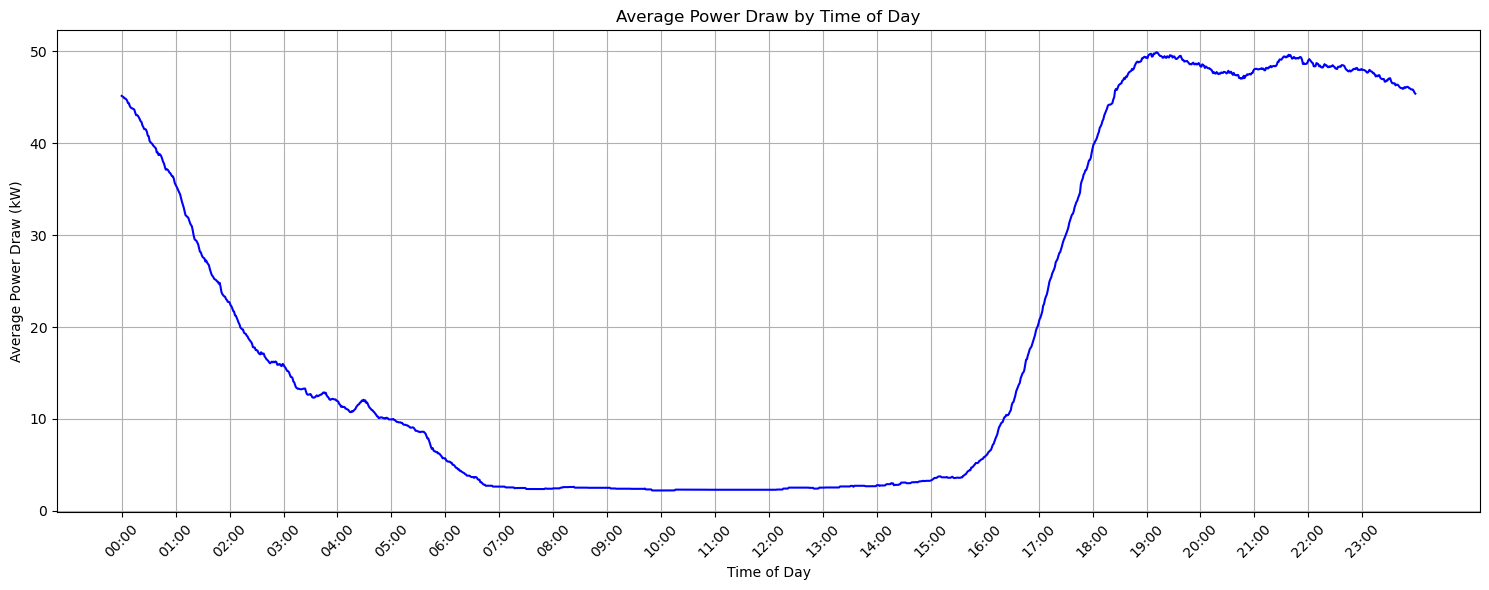

In [44]:
import matplotlib.pyplot as plt

# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot
plt.figure(figsize=(15, 6))
plt.plot(average_power_kw, color='blue', linewidth=1.5)
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day")
plt.grid(True)
plt.tight_layout()
plt.show()

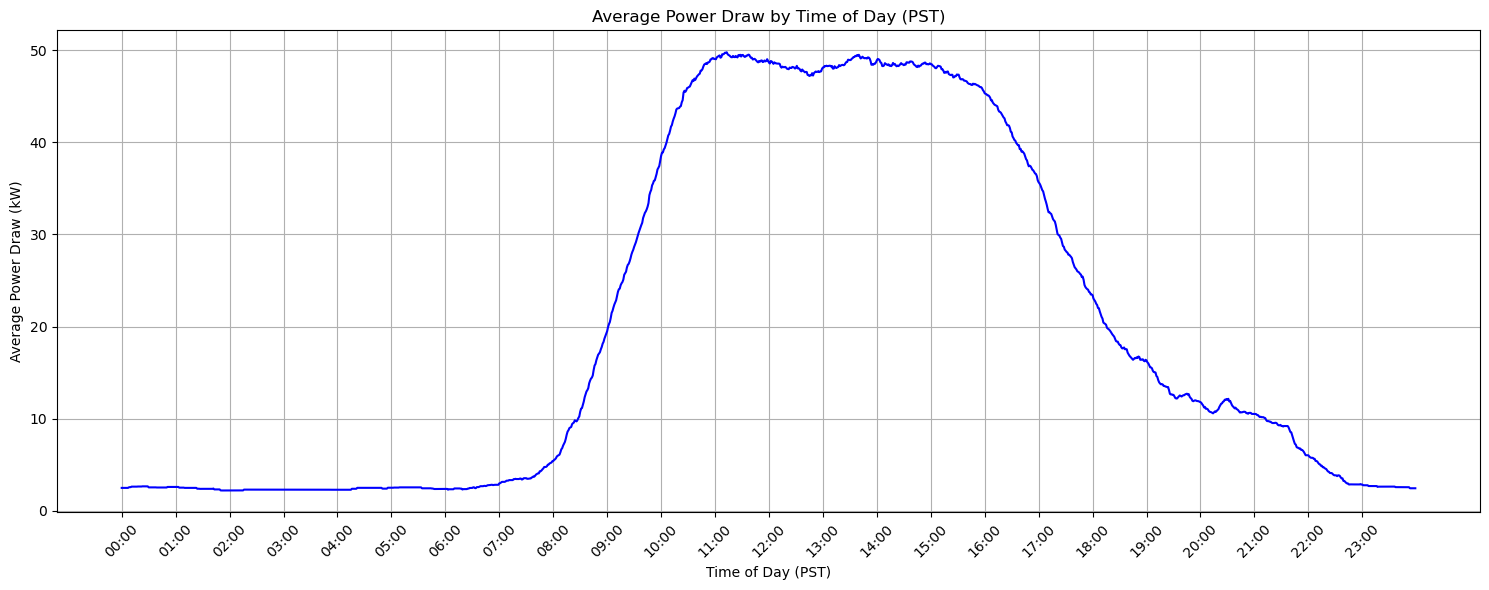

In [45]:
import pandas as pd
import pytz
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")

# Define time zones
gmt_tz = pytz.timezone("GMT")
pst_tz = pytz.timezone("US/Pacific")

# Parse timestamps as UTC (since GMT is equivalent to UTC)
df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')

# Convert from UTC (GMT) to Pacific Time, handling daylight savings
df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)

# Drop rows with missing timestamps or kWhDelivered
df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered'])

# Create a vector for total minutes in a day (PST time)
minutes_in_day = 24 * 60
energy_per_minute = np.zeros(minutes_in_day)
count_per_minute = np.zeros(minutes_in_day)

# Process each session
for _, row in df.iterrows():
    start = row['connectionTime']
    end = row['disconnectTime']
    energy = row['kWhDelivered']
    
    if end <= start:
        continue  # Skip invalid sessions

    # Spread energy evenly over session duration
    duration_minutes = int((end - start).total_seconds() / 60)
    if duration_minutes == 0:
        continue

    energy_per_session_minute = energy / duration_minutes

    for i in range(duration_minutes):
        minute_time = start + timedelta(minutes=i)
        minute_of_day = minute_time.hour * 60 + minute_time.minute
        energy_per_minute[minute_of_day] += energy_per_session_minute
        count_per_minute[minute_of_day] += 1

# Calculate average power draw in kW
average_power_kw = energy_per_minute  # Already in kWh per minute

# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot
plt.figure(figsize=(15, 6))
plt.plot(average_power_kw, color='blue', linewidth=1.5)
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\thijs\AppData\Local\Temp\ipykernel_26704\4013915387.py:14: DtypeWarning: Columns (169,170,171,177,178,179,185,186,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


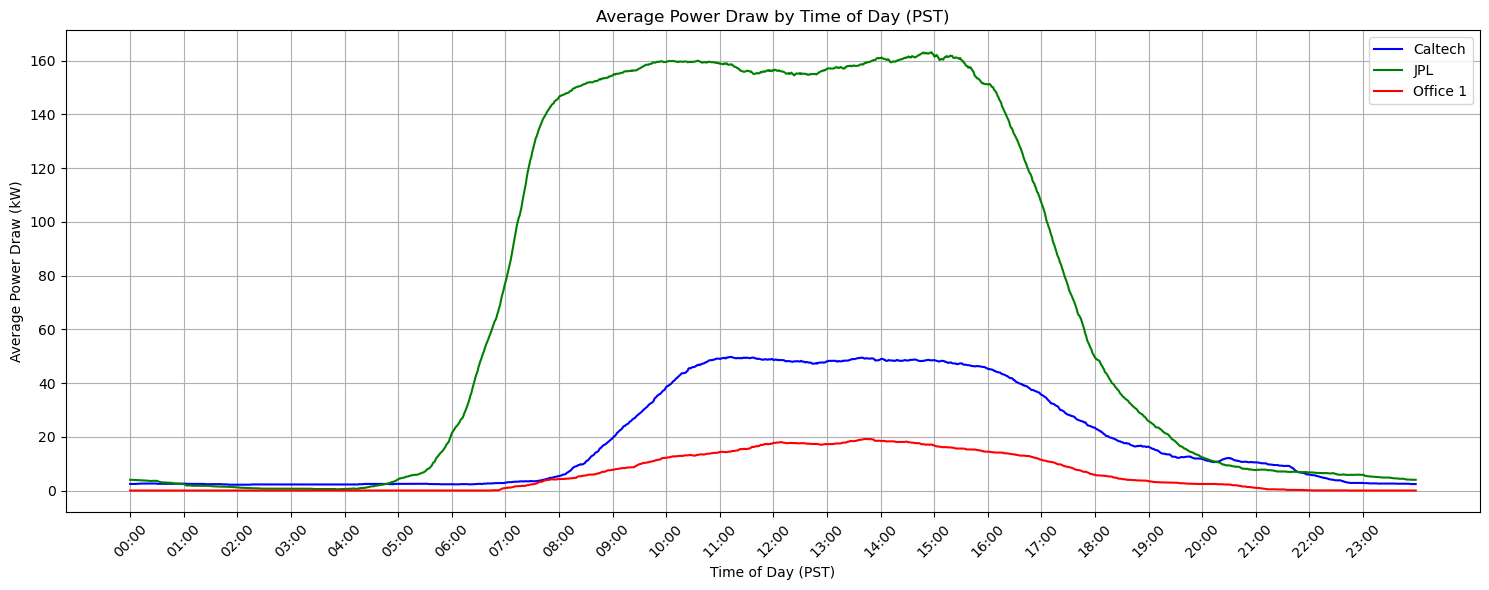

In [48]:
import pandas as pd
import pytz
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Define time zones
gmt_tz = pytz.timezone("GMT")
pst_tz = pytz.timezone("US/Pacific")

# Function to process each CSV file
def process_csv(file_path):
    # Load CSV
    df = pd.read_csv(file_path)

    # Parse timestamps as UTC (since GMT is equivalent to UTC)
    df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')

    # Convert from UTC (GMT) to Pacific Time, handling daylight savings
    df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
    df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)

    # Drop rows with missing timestamps or kWhDelivered
    df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered'])

    # Create vectors for energy and count per minute
    minutes_in_day = 24 * 60
    energy_per_minute = np.zeros(minutes_in_day)
    count_per_minute = np.zeros(minutes_in_day)

    # Process each session
    for _, row in df.iterrows():
        start = row['connectionTime']
        end = row['disconnectTime']
        energy = row['kWhDelivered']
        
        if end <= start:
            continue  # Skip invalid sessions

        # Spread energy evenly over session duration
        duration_minutes = int((end - start).total_seconds() / 60)
        if duration_minutes == 0:
            continue

        energy_per_session_minute = energy / duration_minutes

        for i in range(duration_minutes):
            minute_time = start + timedelta(minutes=i)
            minute_of_day = minute_time.hour * 60 + minute_time.minute
            energy_per_minute[minute_of_day] += energy_per_session_minute
            count_per_minute[minute_of_day] += 1

    return energy_per_minute

# Process the three CSV files
energy_file1 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")
energy_file2 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 jpl.csv")  # Replace with actual file path
energy_file3 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 office1.csv")   # Replace with actual file path

# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot the three energy curves on the same plot
plt.figure(figsize=(15, 6))
plt.plot(energy_file1, color='blue', label='Caltech', linewidth=1.5)
plt.plot(energy_file2, color='green', label='JPL', linewidth=1.5)
plt.plot(energy_file3, color='red', label='Office 1', linewidth=1.5)

# Customize the plot
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [52]:
# Load your dataset
file_path = "Data/acndata_sessions 2019_11 till 2020_5 office1.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Convert time columns to datetime format
df["connectionTime"] = pd.to_datetime(df["connectionTime"], errors="coerce", utc=True)
df["doneChargingTime"] = pd.to_datetime(df["doneChargingTime"], errors="coerce", utc=True)

# Compute charging duration in hours
df["charging_duration_hrs"] = (df["doneChargingTime"] - df["connectionTime"]).dt.total_seconds() / 3600

# Compute power draw (kW)
df["power_draw_kW"] = df["kWhDelivered"] / df["charging_duration_hrs"]

# Filter out invalid values (e.g., division by zero or NaN durations)
df_valid = df[df["charging_duration_hrs"] > 0]
# Sort by connection time
df_valid = df_valid.sort_values(by="connectionTime")

# Create a list of active sessions with their end times and power draws
active_sessions = []
max_total_power = 0

# Iterate through each session
for _, row in df_valid.iterrows():
    start_time = row["connectionTime"]
    end_time = row["doneChargingTime"]
    power_draw = row["power_draw_kW"]
    
    # Remove sessions that have already ended before this one starts
    active_sessions = [(e, p) for e, p in active_sessions if e > start_time]
    
    # Add the new session
    active_sessions.append((end_time, power_draw))
    
    # Calculate total simultaneous power draw
    total_power_draw = sum(p for _, p in active_sessions)
    
    # Update max total power draw
    max_total_power = max(max_total_power, total_power_draw)

max_total_power


34.91702377572868